In [60]:
########prediction car  price with LinearRegression & MultiliearRegression Models###### 
#Loading and exploring our data;
##################################
import pandas as pd


path_in="/home/noura369/Documents/Basic_NOURA2/ABC/CarPrice_Assignment.csv"
df =pd.read_csv(path_in)

In [61]:
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [62]:
df.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [64]:
df.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [86]:
#Splitting company name from CarName column
CompanyName = df['CarName'].apply(lambda x : x.split(' ')[0])
df.insert(3,"CompanyName",CompanyName)
df.drop(['CarName'],axis=1,inplace=True)
df.head()

,car_ID,symboling,CompanyName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [87]:
df.CompanyName.unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

In [91]:
df.CompanyName = df.CompanyName.str.lower()

def replace_name(a,b):
    df.CompanyName.replace(a,b,inplace=True)

replace_name('maxda','mazda')
replace_name('porcshce','porsche')
replace_name('toyouta','toyota')
replace_name('vokswagen','volkswagen')
replace_name('vw','volkswagen')

df.CompanyName.unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi',
       'nissan', 'peugeot', 'plymouth', 'porsche', 'renault', 'saab',
       'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

In [93]:
df.CompanyName.unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi',
       'nissan', 'peugeot', 'plymouth', 'porsche', 'renault', 'saab',
       'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

In [100]:
#Checking for duplicates
df.loc[df.duplicated()]

,car_ID,symboling,CompanyName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price


In [102]:
df.columns

Index(['car_ID', 'symboling', 'CompanyName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

In [94]:
df.describe(include='object')

,CompanyName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,enginetype,cylindernumber,fuelsystem
count,205,205,205,205,205,205,205,205,205,205
unique,22,2,2,2,5,3,2,7,7,8
top,toyota,gas,std,four,sedan,fwd,front,ohc,four,mpfi
freq,32,185,168,115,96,120,202,148,159,94


In [95]:
df.shape

(205, 26)

In [96]:
#Applying the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn import metrics
from sklearn import tree   
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import PolynomialFeatures 

/home/noura369/.local/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


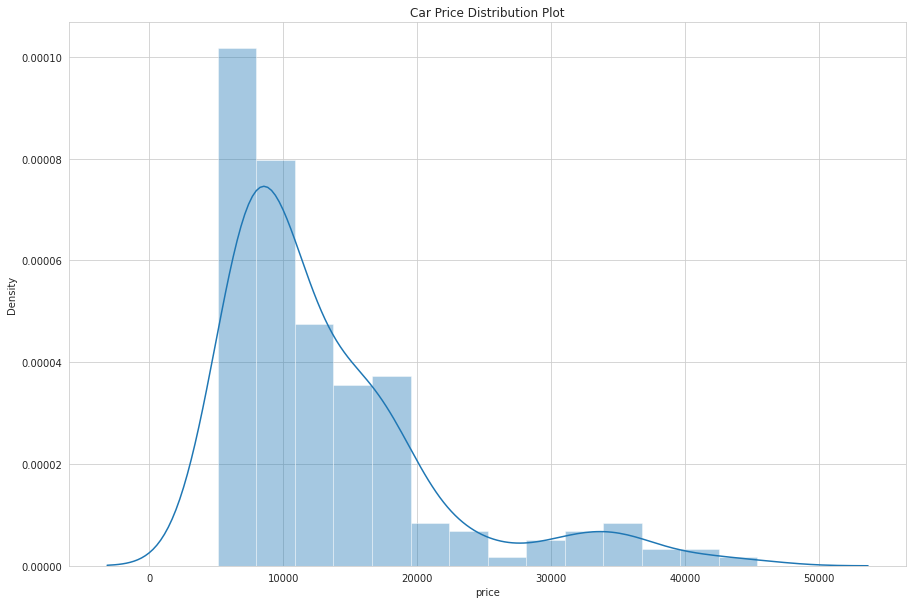

In [103]:
#Data Vizualization#
###################
sns.set_style("whitegrid")
plt.figure(figsize=(15, 10))
sns.distplot(df.price)
plt.title('Car Price Distribution Plot')
plt.show()

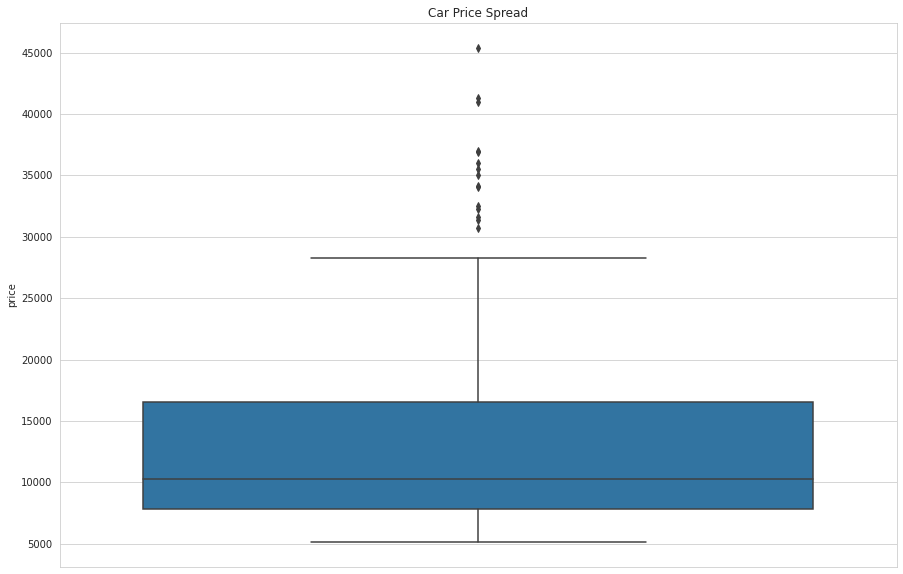

In [105]:
plt.figure(figsize=(15, 10))

plt.title('Car Price Spread')
sns.boxplot(y=df.price)
plt.show()

In [106]:
print(df.price.describe(percentiles = [0.25,0.50,0.75,0.85,0.90,1]))

count      205.000000
mean     13276.710571
std       7988.852332
min       5118.000000
25%       7788.000000
50%      10295.000000
75%      16503.000000
85%      18500.000000
90%      22563.000000
100%     45400.000000
max      45400.000000
Name: price, dtype: float64


In [107]:
'''first_Observation'''
'''The distribution graph is right-skewed, so most prices(Below 15,000).
There is a significant difference between the mean and the median of the price distribution.
The data points are far spread out from the mean,
which indicates a high variance in the car prices.(85% of the prices are below 18,500, whereas the remaining 15% are between 18,500 and 45,400.)'''

'The distribution graph is right-skewed, so most prices(Below 15,000).\nThere is a significant difference between the mean and the median of the price distribution.\nThe data points are far spread out from the mean,\nwhich indicates a high variance in the car prices.(85% of the prices are below 18,500, whereas the remaining 15% are between 18,500 and 45,400.)'

In [98]:
print(df.corr())

                    car_ID  symboling  wheelbase  carlength  carwidth  \
car_ID            1.000000  -0.151621   0.129729   0.170636  0.052387   
symboling        -0.151621   1.000000  -0.531954  -0.357612 -0.232919   
wheelbase         0.129729  -0.531954   1.000000   0.874587  0.795144   
carlength         0.170636  -0.357612   0.874587   1.000000  0.841118   
carwidth          0.052387  -0.232919   0.795144   0.841118  1.000000   
carheight         0.255960  -0.541038   0.589435   0.491029  0.279210   
curbweight        0.071962  -0.227691   0.776386   0.877728  0.867032   
enginesize       -0.033930  -0.105790   0.569329   0.683360  0.735433   
boreratio         0.260064  -0.130051   0.488750   0.606454  0.559150   
stroke           -0.160824  -0.008735   0.160959   0.129533  0.182942   
compressionratio  0.150276  -0.178515   0.249786   0.158414  0.181129   
horsepower       -0.015006   0.070873   0.353294   0.552623  0.640732   
peakrpm          -0.203789   0.273606  -0.360469  -

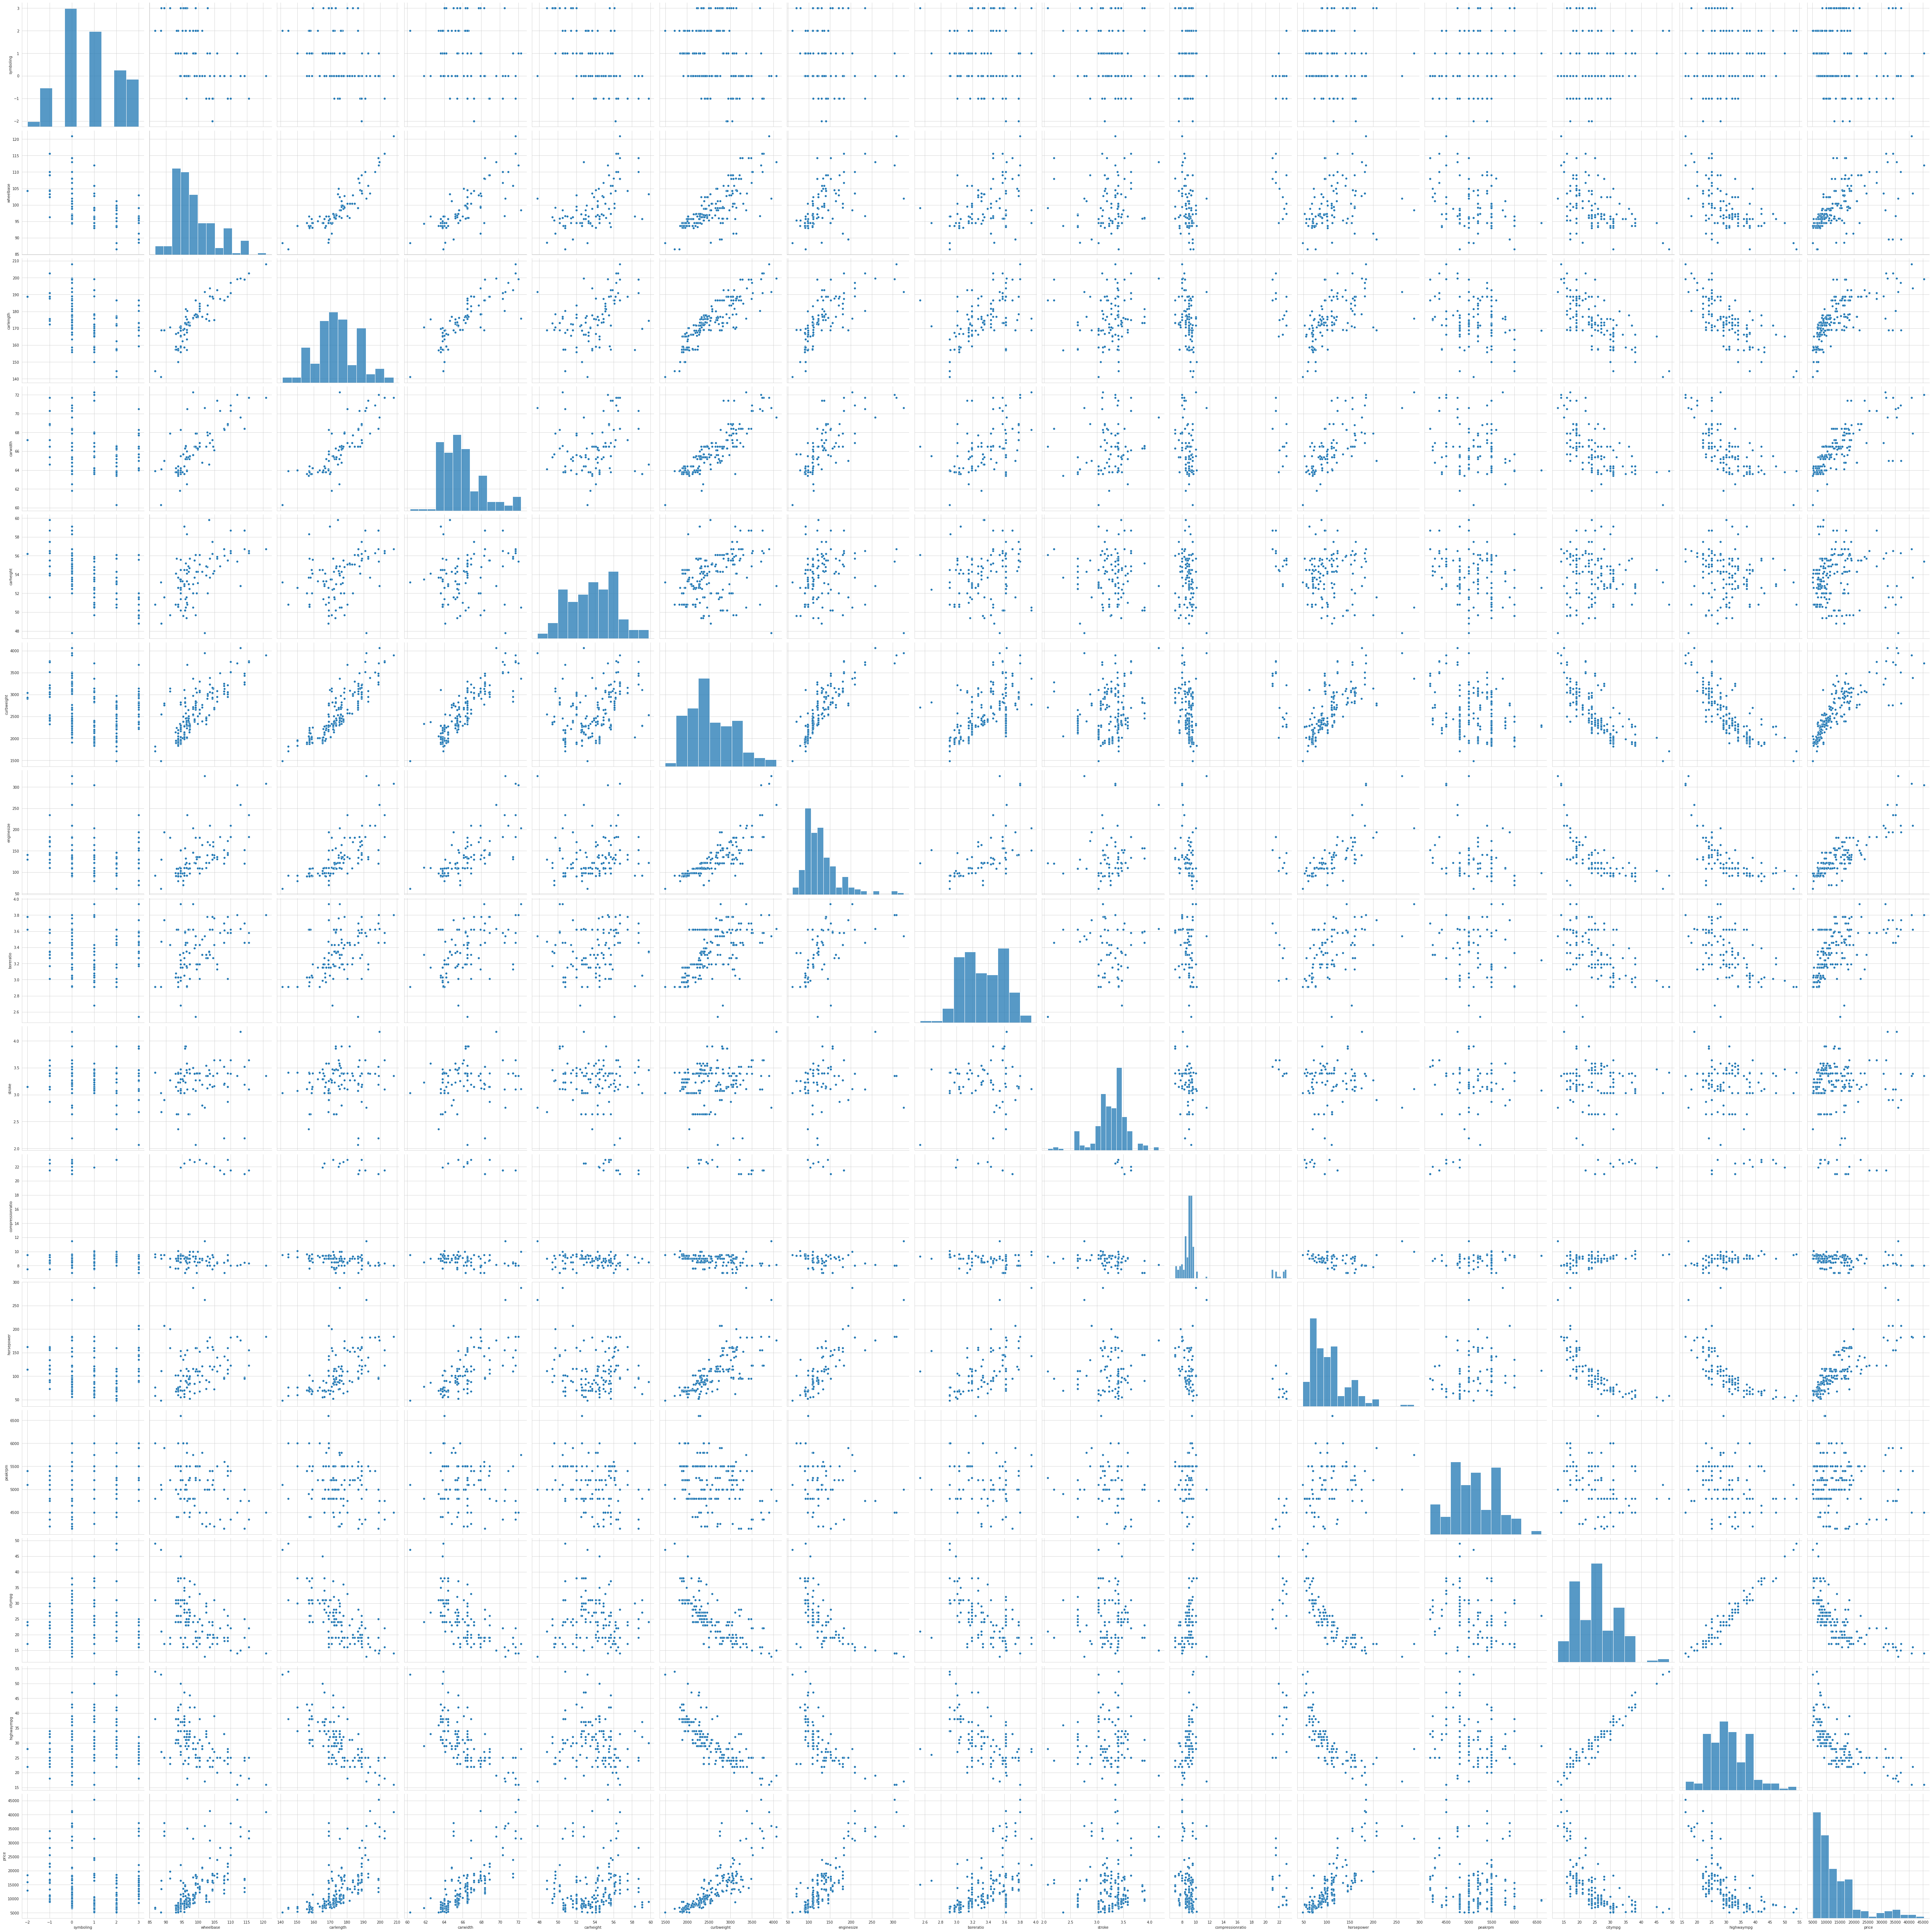

In [99]:
#I used Pairplots to visualize correlation:
cols = ['symboling', 'wheelbase', 'carlength','carwidth', 'carheight', 'curbweight','enginesize', 'boreratio', 'stroke','compressionratio', 'horsepower','peakrpm',
        'citympg', 'highwaympg','price']
sns.pairplot(df[cols], height = 5)
plt.show()

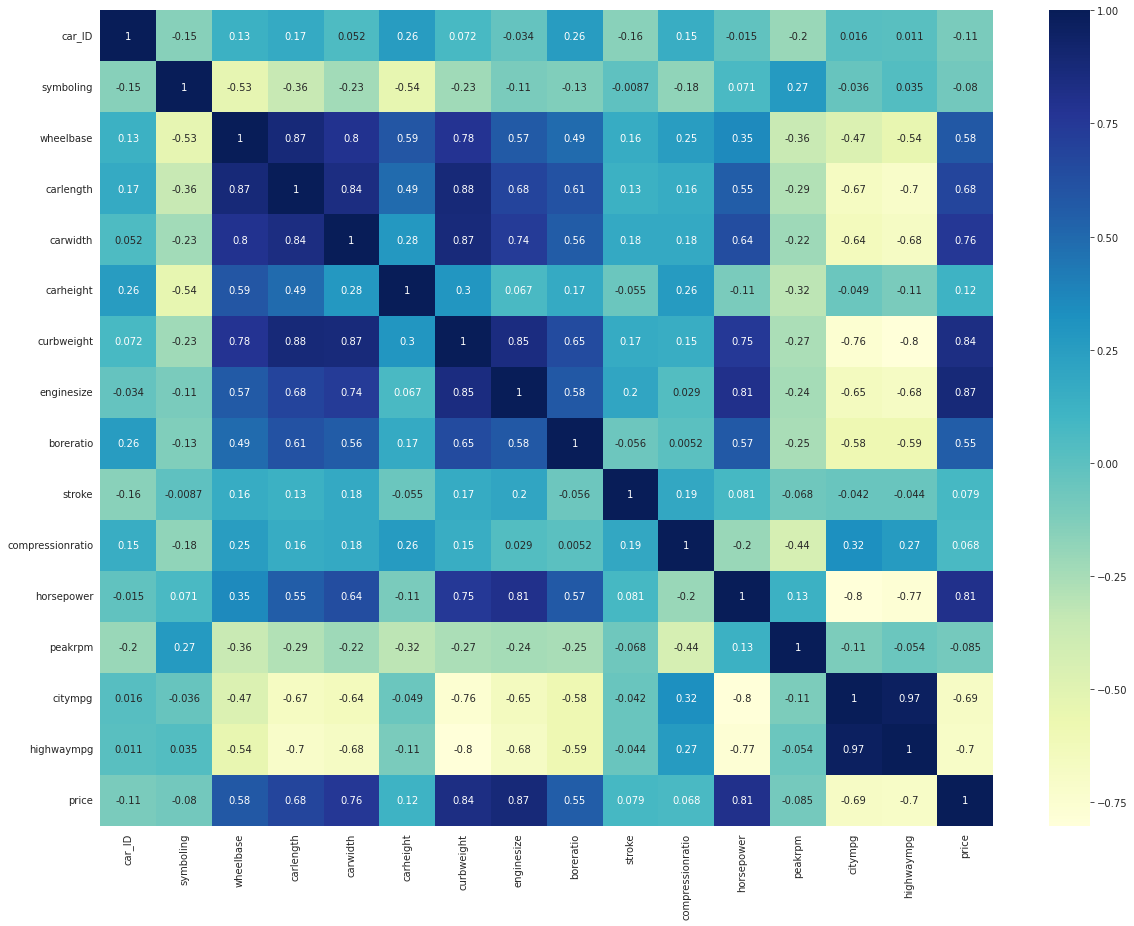

In [69]:
plt.figure(figsize=(20, 15))
correlations = df.corr()
sns.heatmap(correlations, cmap="YlGnBu", annot=True)
plt.show()

/home/noura369/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/home/noura369/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/home/noura369/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/home/nour

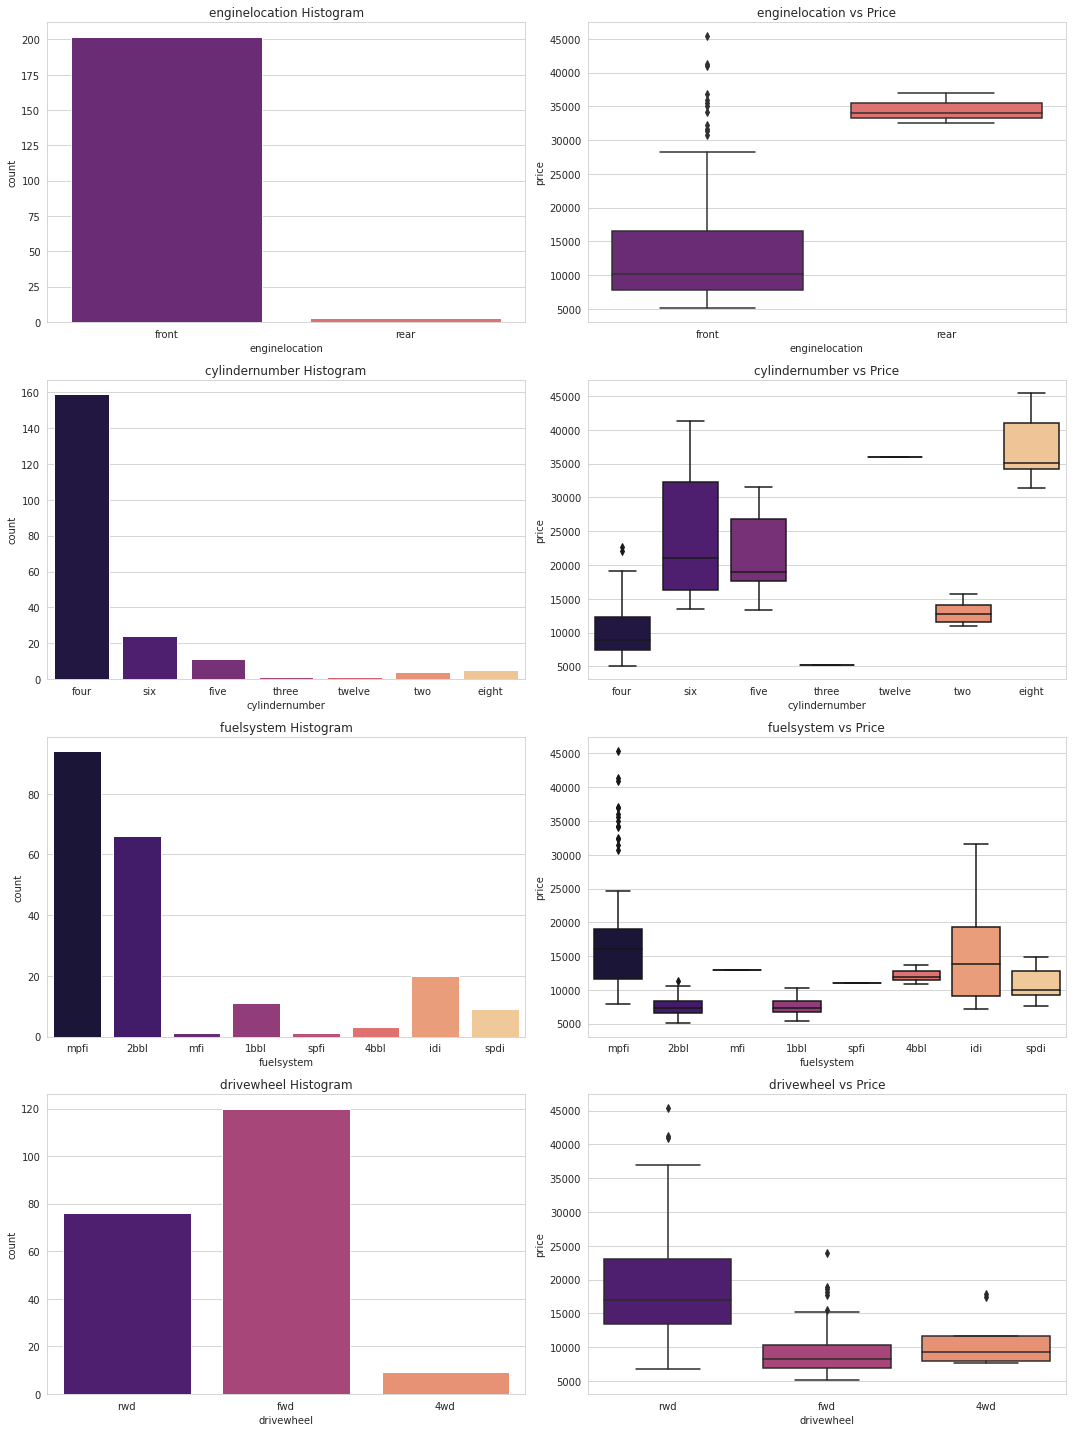

In [108]:

def plot_count(x,fig):
    plt.subplot(4,2,fig)
    plt.title(x+' Histogram')
    sns.countplot(df[x],palette=("magma"))
    plt.subplot(4,2,(fig+1))
    plt.title(x+' vs Price')
    sns.boxplot(x=df[x], y=df.price, palette=("magma"))
    
plt.figure(figsize=(15,20))

plot_count('enginelocation', 1)
plot_count('cylindernumber', 3)
plot_count('fuelsystem', 5)
plot_count('drivewheel', 7)

plt.tight_layout()

In [110]:
'''Most common number of cylinders are four, six and five. Though eight cylinders have the highest price range.
mpfi and 2bbl are most common type of fuel systems. mpfi and idi having the highest price range. But there are few data for other categories to derive any meaningful inference
A very significant difference in drivewheel category. Most high ranged cars seeme to prefer rwd drivewheel.'''

'Most common number of cylinders are four, six and five. Though eight cylinders have the highest price range.\nmpfi and 2bbl are most common type of fuel systems. mpfi and idi having the highest price range. But there are few data for other categories to derive any meaningful inference\nA very significant difference in drivewheel category. Most high ranged cars seeme to prefer rwd drivewheel.'

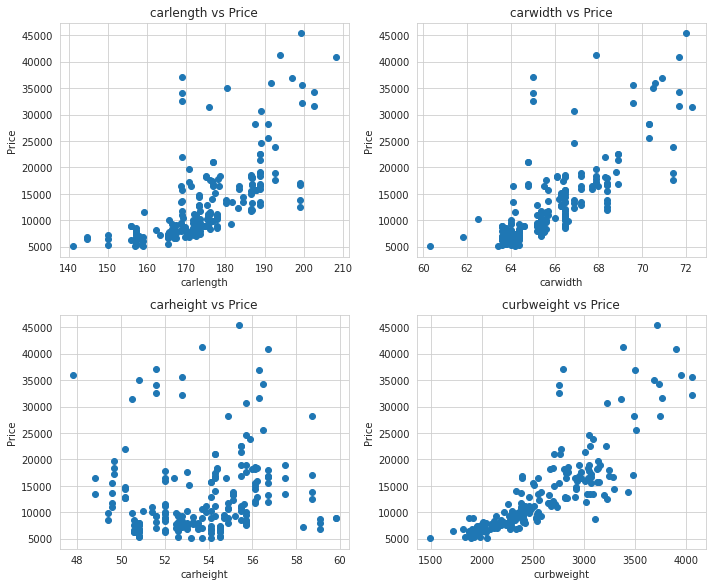

In [112]:
def scatter(x,fig):
    plt.subplot(5,2,fig)
    plt.scatter(df[x],df['price'])
    plt.title(x+' vs Price')
    plt.ylabel('Price')
    plt.xlabel(x)

plt.figure(figsize=(10,20))

scatter('carlength', 1)
scatter('carwidth', 2)
scatter('carheight', 3)
scatter('curbweight', 4)

plt.tight_layout()

In [115]:
'''carwidth, carlength and curbweight seems to have a poitive correlation with price.'''

'carwidth, carlength and curbweight seems to have a poitive correlation with price.'

In [117]:
#Linear_Regression_Model####
############################
#extract x and y from our data
x=df[["horsepower"]]
y=df["price"]
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.35,random_state=40) #splitting data with test size of 35%

In [118]:
model=LinearRegression()   #build linear regression model
model.fit(x_train,y_train)  #fitting the training data
predicted=model.predict(x_test) #testing our model’s performance

In [119]:
print("MSE", mean_squared_error(y_test,predicted))
print("R squared", metrics.r2_score(y_test,predicted))

MSE 15565250.09374461
R squared 0.4636572421639539


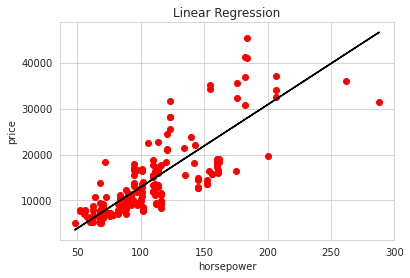

In [120]:
plt.scatter(x,y,color="r")
plt.title("Linear Regression")
plt.ylabel("price")
plt.xlabel("horsepower")
plt.plot(x,model.predict(x),color="k")
plt.show()

In [121]:
##Multiple_linear_regression Model####
#########################################
#extract x and y from our data
x=df[['wheelbase', 'carlength','carwidth', 'carheight', 'curbweight','enginesize','compressionratio', 'horsepower','peakrpm',
        'citympg', 'highwaympg']]  #we have more than one input
y=df["price"].values
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.35,random_state=40) #splitting data with test size of 35%

model=LinearRegression() #build linear regression model
model.fit(x_train,y_train) #fitting the training data
predicted=model.predict(x_test) #testing our model’s performance

print("MSE", mean_squared_error(y_test,predicted))
print("R squared", metrics.r2_score(y_test,predicted))

MSE 7120442.199197149
R squared 0.7546459206804299


In [122]:
# Import the models;
lg = LinearRegression() 
poly = PolynomialFeatures(degree = 2) 

In [123]:
# Appling the fit transform 
x_=poly.fit_transform(x)

In [124]:
print("x before transformation: ", x)
print("x after transformation: ", x_)

lg.fit(x_, y) # Fitting Polynomial Regression to the dataset 

x before transformation:       wheelbase  carlength  carwidth  carheight  curbweight  enginesize  \
0         88.6      168.8      64.1       48.8        2548         130   
1         88.6      168.8      64.1       48.8        2548         130   
2         94.5      171.2      65.5       52.4        2823         152   
3         99.8      176.6      66.2       54.3        2337         109   
4         99.4      176.6      66.4       54.3        2824         136   
..         ...        ...       ...        ...         ...         ...   
200      109.1      188.8      68.9       55.5        2952         141   
201      109.1      188.8      68.8       55.5        3049         141   
202      109.1      188.8      68.9       55.5        3012         173   
203      109.1      188.8      68.9       55.5        3217         145   
204      109.1      188.8      68.9       55.5        3062         141   

     compressionratio  horsepower  peakrpm  citympg  highwaympg  
0                 9

LinearRegression()

In [125]:
predicted=model.predict(x_test) #testing our model’s performance

print("MSE", mean_squared_error(y_test,predicted))
print("R squared", metrics.r2_score(y_test,predicted))

MSE 7120442.199197149
R squared 0.7546459206804299


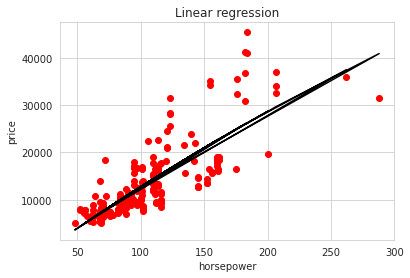

In [126]:
x= df["horsepower"].values.reshape(-1,1)
y= df["price"].values
poly = PolynomialFeatures(degree = 2) 
x_poly = poly.fit_transform(x) 
poly.fit(x_poly, y) 
lg=LinearRegression()
lg.fit(x_poly, y) 

plt.scatter(x, y, color="r")
plt.title("Linear regression")
plt.ylabel("price")
plt.xlabel("horsepower")
plt.plot(x, lg.predict(poly.fit_transform(x)), color="k") 

In [127]:
'''#In Linear Reg. I got:
MSE 15565250.09374461
R squared 0.4636572421639539
*In Multilinear Regression I got:
MSE 7120442.199197149
R squared 0.7546459206804299 '''

'#In Linear Reg. I got:\nMSE 15565250.09374461\nR squared 0.4636572421639539\n*In Multilinear Regression I got:\nMSE 7120442.199197149\nR squared 0.7546459206804299 '